<a href="https://colab.research.google.com/github/Kaushal-DCU-2023-25/CA683I_DA_AM_Assignment/blob/main/Kaushal_Module_2_Pre_Processing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install requests
!pip install beautifulsoup

import requests
import bs4

data = requests.get("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)", headers={
    "UserAgent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.183 Safari/537.36"
}).text
print(data)
web_data = bs4.BeautifulSoup(data, 'lxml')
#print(web_data)
#print(web_data.head.title)
imf_table = web_data.find_all(name="table", attrs = {"class": "wikitable"})[0]
#print(list(imf_table.tbody.children)[0])

  Using cached BeautifulSoup-3.2.2.tar.gz (32 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-dis

In [22]:
#Excercise
import pandas as pd
data = requests.get("http://www.csgnetwork.com/llinfotable.html").text
web_data = bs4.BeautifulSoup(data, 'lxml')
#print(web_data)
df = pd.read_html("http://www.csgnetwork.com/llinfotable.html")
print(df[5].describe())

              0         1        2        3
count       201       200      201      201
unique      201       199      198      200
top     Country  Kingston  64°10'N  27°30'E
freq          1         2        2        2


In [33]:
import pandas as pd
from sklearn.datasets import load_iris
data=load_iris()
type(data)
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


AttributeError: 'FigureCanvasAgg' object has no attribute 'set_window_title'

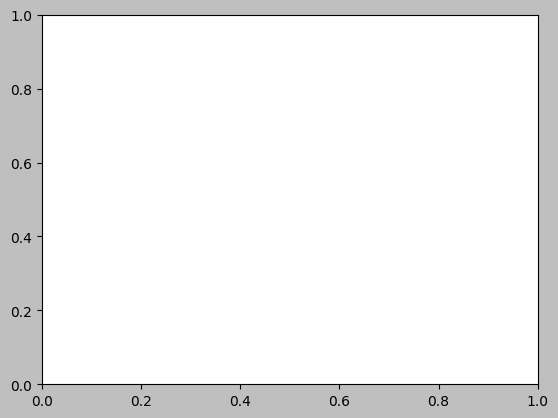

In [37]:
!pip install pyspc

from pyspc import *

a = spc(pistonrings) + ewma()
print(a)
a + cusum()
a + rules()

<Axes: >

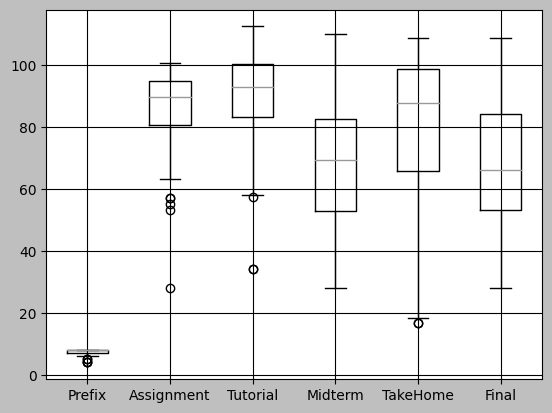

In [47]:
df = pd.read_csv('/content/class-grades.csv - Sheet1.csv')
df.head(5)
df.boxplot()

In [48]:
import pandas as pd
import numpy as np

from statsmodels.api import add_constant
import statsmodels.discrete.discrete_model as sml
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

candidates = {'Ed_standard': [780,750,690,710,680,730,690,720,740,900,950,975,995,1000,1010,1020],
              'Work_experience':[5.1,4.5,None,3.3,3.6,9.3,6.7,2.8,5.4,None,7.8,None,None,10.1,6.7,None],
              'Salary': [78000,75000,100000,71000,68000,70000,69000,72000,74000,69000,102000,101000,79000,114000,101000,95000],
              'happiness': [0.5,0.55,0.1,0.6,0.7,0.45,0.56,0.73,0.45,0.67,0.43,0.23,0.78,0.42,0.36,0.23]
              }
df = pd.DataFrame(candidates,columns= ['Ed_standard','Salary','Work_experience','happiness'])

#df.describe()
df.loc[df['Work_experience'].isnull()==False, 'Missing']=0
df.loc[df['Work_experience'].isnull()==True, 'Missing']=1
#print(df.head())

df.corr()

logit = sml.Logit(df['Missing'], df[['Ed_standard','Salary']]).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.625912
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Missing   No. Observations:                   16
Model:                          Logit   Df Residuals:                       14
Method:                           MLE   Df Model:                            1
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:               -0.007769
Time:                        23:06:50   Log-Likelihood:                -10.015
converged:                       True   LL-Null:                       -9.9374
Covariance Type:            nonrobust   LLR p-value:                     1.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Ed_standard     0.0029      0.005      0.581      0.561      -0.007       0.013
Salary      -3.715e-05   5

In [88]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

y=np.array([[780,750,690,710,680,730,690,720,740,900,950,975,995,1000,1010,1020],
    [5.1,4.5,np.nan,3.3,3.6,9.3,6.7,2.8,5.4,np.nan,7.8,np.nan,np.nan,10.1,6.7,np.nan],
    [78000,75000,100000,71000,68000,70000,69000,72000,74000,69000,102000,101000,79000,114000,101000,95000],
    [0.5,0.55,0.1,0.6,0.7,0.45,0.56,0.73,0.45,0.67,0.43,0.23,0.78,0.42,0.36,0.23]])
df = pd.DataFrame(y.transpose())
#print(df.describe())
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
y = imputer.fit_transform(df)
#print(y)

iterative_imputer =IterativeImputer(max_iter=100, sample_posterior=True, tol= 0.000001)
y=iterative_imputer.fit_transform(df)
#print(y)

imputer = KNNImputer(n_neighbors=2, weights="distance")
imputer = imputer.fit(df[[0, 2, 3]], df[1])
y_res = imputer.fit_transform(df)
print(y_res)

[[7.80000000e+02 5.10000000e+00 7.80000000e+04 5.00000000e-01]
 [7.50000000e+02 4.50000000e+00 7.50000000e+04 5.50000000e-01]
 [6.90000000e+02 7.07659925e+00 1.00000000e+05 1.00000000e-01]
 [7.10000000e+02 3.30000000e+00 7.10000000e+04 6.00000000e-01]
 [6.80000000e+02 3.60000000e+00 6.80000000e+04 7.00000000e-01]
 [7.30000000e+02 9.30000000e+00 7.00000000e+04 4.50000000e-01]
 [6.90000000e+02 6.70000000e+00 6.90000000e+04 5.60000000e-01]
 [7.20000000e+02 2.80000000e+00 7.20000000e+04 7.30000000e-01]
 [7.40000000e+02 5.40000000e+00 7.40000000e+04 4.50000000e-01]
 [9.00000000e+02 7.14595202e+00 6.90000000e+04 6.70000000e-01]
 [9.50000000e+02 7.80000000e+00 1.02000000e+05 4.30000000e-01]
 [9.75000000e+02 6.73718709e+00 1.01000000e+05 2.30000000e-01]
 [9.95000000e+02 4.97799832e+00 7.90000000e+04 7.80000000e-01]
 [1.00000000e+03 1.01000000e+01 1.14000000e+05 4.20000000e-01]
 [1.01000000e+03 6.70000000e+00 1.01000000e+05 3.60000000e-01]
 [1.02000000e+03 7.20767902e+00 9.50000000e+04 2.300000

In [128]:
import numpy as np
print(np.log10(9/10))
pd_votes = pd.read_csv("/content/illinois_vote_2016.csv")

#print(pd_votes.head())

def count_first_digit(data):
  result = np.zeros(10);
  for val in data:
    first_digit = int(str(val)[:1])
    #print(first_digit)
    result[first_digit] = result[first_digit] + 1

  return result;

print(count_first_digit(pd_votes['Dem_Votes']))


-0.045757490560675115
[ 0. 36. 15. 11. 11.  8.  5.  5.  7.  4.]


In [136]:
import pandas as pd
from scipy import stats
from mlxtend.preprocessing import minmax_scaling

s1 = pd.Series([1, 2, 3, 4, 5, 6], index=(range(6)))
s2 = pd.Series([10, 9, 8, 7, 6, 5], index=(range(6)))
df = pd.DataFrame(s1, columns=['s1'])
df['s2'] = s2
print(minmax_scaling(df, columns=['s1', 's2']))
print(stats.zscore(df))

    s1   s2
0  0.0  1.0
1  0.2  0.8
2  0.4  0.6
3  0.6  0.4
4  0.8  0.2
5  1.0  0.0
        s1       s2
0 -1.46385  1.46385
1 -0.87831  0.87831
2 -0.29277  0.29277
3  0.29277 -0.29277
4  0.87831 -0.87831
5  1.46385 -1.46385


In [140]:
X=pd.Series([231,12,4500,-110, 24.5,673.1, 2100.23, -2, -99.2, 1999, 2410,-112,-45,1101.78, 2567.5,6.1, 109.4, 4.5, -456.6, 1.231, 3152])



print(X.sort_values())
print(X.quantile(.05))
print(X.quantile(.95))
print(X.max())
print(X.min())
print(X.min())

18    -456.600
11    -112.000
3     -110.000
8      -99.200
12     -45.000
7       -2.000
19       1.231
17       4.500
15       6.100
1       12.000
4       24.500
16     109.400
0      231.000
5      673.100
13    1101.780
9     1999.000
6     2100.230
10    2410.000
14    2567.500
20    3152.000
2     4500.000
dtype: float64
-112.0
3152.0
4500.0
-456.6
-456.6


[Text(0.6, 0.8333333333333334, 'x[0] <= 62.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.4, 0.5, 'x[0] <= 37.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

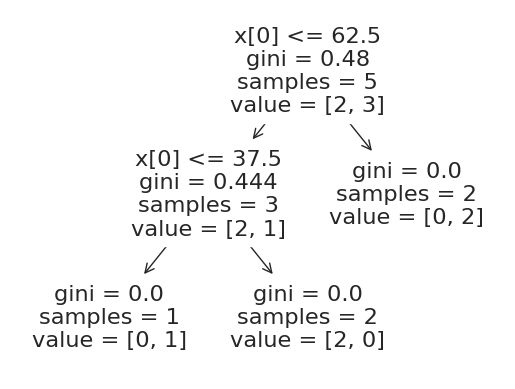

In [141]:
from sklearn import tree
X = [[100],[50],[30],[45],[75]]
Y = [1, 0,1,0,1]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
tree.plot_tree(clf.fit(X, Y))

In [26]:
# 3 4 5 rule impl
import numpy as np
import pandas as pd
import math

def rule(min, max):
 range = max - min
 msd = int(str(range)[:1])
 result = []
 if msd in [1, 5, 10]:
   gap = range/5
   result = [min, min + gap, min + 2* gap, min + 3* gap, min + 4* gap, min + 5* gap]
 elif msd in [2, 4, 8]:
   gap = range/4
   result = [min, min + gap, min + 2* gap, min + 3* gap,  min + 4* gap]
 elif msd in [3, 6, 9]:
   gap = range/3
   result = [min, min + gap, min + 2* gap, min + 3* gap]
 elif msd in [7]:
   gap = range/7
   result = [min, min + 2 * gap, min + 5* gap, min + 7 * gap]

 return result;

X=pd.Series([231,12,4500,-110, 24.5,673.1, 2100.23, -2, -99.2, 1999, 2410,-112,-45,1101.78, 2567.5,6.1, 109.4, 4.5, -456.6, 1.231, 3152])
X = X.sort_values();

min = X.quantile(0.05)
max = X.quantile(0.95)
print(math.floor(len(X)*0.05))
print(math.floor(len(X)*0.95))
print(X.quantile(0.05))
pow = math.floor(math.log10(np.abs(X).max()))


min_round = math.floor(math.floor((min) / (10**pow)) * (10**pow))
max_round = math.ceil(math.ceil((max) / (10**pow))  * (10**pow))

print(f'min: {min} max: {max} pow: {pow} min_round : {min_round} max_round : {max_round}')

print(f'rule output : {rule(min_round, max_round)}')


1
19
-112.0
min: -112.0 max: 3152.0 pow: 3 min_round : -1000 max_round : 4000
rule output : [-1000, 0.0, 1000.0, 2000.0, 3000.0, 4000.0]
